# Case Study : Feature Engineering

<b>Problem Statement:<b>
    
Perform feature engineering on the input dataset which has data related to the shpping delivery time. Also find out the correlation between various features from the dataset.
    
1. What is the correlation between actual_distance_to_destination and actual_time
2. What is the correlation between osrm_distance and osrm_time
3. What is the correlation between segment_osrm_distance and segment_osrm_time
4. What types of trips are more? Carting or FTL
5. Which source state has the highest number of trips
6. Which source state has the highest number of FTL trips
7. Which source state has the highest number of Carting trips
8. Which destination state has the highest number of trips
9. Which destination state has the highest number of FTL trips
10. Which destination state has the highest number of Carting trips
11. Which source city has the highest number of trips
12. which source city has the highest number of FTL trips
13. Which source city has the highest number of Carting trips
14. Which destination city has the highest number of trips
15. which destination city has the highest number of FTL trips
16. Which destination city has the highest number of Carting trips
17. Is the mean start_scan_to_end_scan same as od_time_diff?
18. Is the mean actual time and osrm time same?
19. Is the mean actual time and segment actual time same?
20. Is the mean osrm distance and segment osrm distance same?
21. Is the mean osrm time and segment osrm time same?

In [946]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
import warnings

In [947]:
# Set global parameters

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [948]:
sns.set_style('darkgrid')

In [949]:
warnings.filterwarnings('ignore')

# Read Data
1. Check dataframe info
2. Check shape
3. Check Missing data
4. Treat Missing data
5. Do value counts for categorical data

In [950]:
# Read csv file into to pandas dataframe

data = pd.read_csv('train.csv')

In [951]:
# Copy dataframe to work dataframe

df = data.copy()

In [952]:
# Display shape of dataframe

df.shape

(144867, 24)

In [953]:
# Dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [954]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [955]:
# Function to determine the total values, total missing values and percentage of missing values

missing_values = df.isna().sum()
total_values = df.count()
missing_values_df = pd.DataFrame({'column_name':df.columns,
                              'Total_values':total_values.values,
                              'Missing_values':missing_values.values,
                                'Percentage_missing':(missing_values.values/total_values.values*100).round(2)})

In [956]:
# Display missing values
#1. Source name has misssing values but percentage is very very small i.e. 0.20%
#2. Destination name has missing values but percentage is very very small i.e. 0.18%

missing_values_df

,column_name,Total_values,Missing_values,Percentage_missing
0,data,144867,0,0.00
1,trip_creation_time,144867,0,0.00
2,route_schedule_uuid,144867,0,0.00
3,route_type,144867,0,0.00
4,trip_uuid,144867,0,0.00
5,source_center,144867,0,0.00
6,source_name,144574,293,0.20
7,destination_center,144867,0,0.00
8,destination_name,144606,261,0.18
9,od_start_time,144867,0,0.00


In [957]:
# Get a glimpse of null values in source name

df[df['source_name'].isna()].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,22,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,44,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,66,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,88,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,110,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556


In [958]:
# Get a glimpse of null values in destination name

df[df['destination_name'].isna()].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
110,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,True,22,2018-09-26 05:57:25,24.538214,58.0,33.0,30.8845,1.757576,58.0,33.0,30.8845,1.757576
111,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,113.0,False,34,2018-09-26 05:04:49.254901,34.657709,110.0,43.0,41.5361,2.558140,52.0,10.0,10.6517,5.200000
982,test,2018-10-01 20:56:18.155260,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND573103AAA,Arsikere_HsnRdDPP_D (Karnataka),IND577116AAA,NaN,2018-10-02 01:22:21.450243,2018-10-02 02:07:27.840862,45.0,True,22,2018-10-02 01:38:30,22.029639,21.0,16.0,22.9630,1.312500,21.0,16.0,22.9630,1.312500
983,test,2018-10-01 20:56:18.155260,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND573103AAA,Arsikere_HsnRdDPP_D (Karnataka),IND577116AAA,NaN,2018-10-02 01:22:21.450243,2018-10-02 02:07:27.840862,45.0,False,35,2018-10-02 01:23:30,35.528960,36.0,25.0,36.5050,1.440000,15.0,9.0,13.5420,1.666667
4882,training,2018-09-24 07:18:06.087341,thanos::sroute:2f43f11e-d3ba-4590-9355-82928e1...,FTL,trip-153777348608709328,IND202001AAB,Aligarh_KhirByps_I (Uttar Pradesh),IND282002AAD,NaN,2018-09-24 15:02:13.760270,2018-09-24 18:49:23.454535,227.0,True,22,2018-09-24 18:06:49,22.193687,40.0,26.0,28.9817,1.538462,40.0,26.0,28.9817,1.538462


In [959]:
# Since the percentage of null values/missing vlaues is very very small 
# i.e. 0.20% and 0.18%, we preferred to drop them

df.dropna(subset=['source_name','destination_name'],inplace=True)

In [960]:
# Verify the dataframe after dropping the missing values

missing_values = df.isna().sum()
total_values = df.count()
missing_values_df = pd.DataFrame({'column_name':df.columns,
                              'Total_values':total_values.values,
                              'Missing_values':missing_values.values,
                                'Percentage_missing':(missing_values.values/total_values.values*100).round(2)})
missing_values_df

,column_name,Total_values,Missing_values,Percentage_missing
0,data,144316,0,0.0
1,trip_creation_time,144316,0,0.0
2,route_schedule_uuid,144316,0,0.0
3,route_type,144316,0,0.0
4,trip_uuid,144316,0,0.0
5,source_center,144316,0,0.0
6,source_name,144316,0,0.0
7,destination_center,144316,0,0.0
8,destination_name,144316,0,0.0
9,od_start_time,144316,0,0.0


In [961]:
# Check the value counts of categorical variable "data"

df['data'].value_counts()

training    104632
test         39684
Name: data, dtype: int64

In [962]:
# Print the percentages of value_counts of categorical variable "data"

print('Train data:{}%'.format(round(104632/144316*100,2)))
print('Test data:{}%'.format(round(39685/144316*100,2)))

Train data:72.5%
Test data:27.5%


# Feature Engg
1. Update column datatypes
2. Extract new features from existing features
3. Create new columns
4. Drop old/unnecessary columns

In [963]:
# Converet "trip_creation_time" from object to datatime datatype

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])

In [964]:
# Strip 'route_schedule_uuid' to remove unwanted part from it's values and make the column cleaner

x = df['route_schedule_uuid'].str.split('::')
x = df['route_schedule_uuid'].str.split(':')
x = [i[3] for i in x]
df['route_schedule_uuid'] = x

In [965]:
# Strip 'trip_uuid' to remove the unwanted part from it's values and make the column cleaner

x = df['trip_uuid'].str.split('-')
x = [i[1] for i in x]
df['trip_uuid'] = x

In [966]:
# Extract 'source_state' from source_name and add new column source state to the dataframe

x = df['source_name'].str.split(' ')
x = [i[1].strip('()') for i in x]
df['source_state'] = x

In [967]:
# Extract city and place code from source_name and replace source_name with city and place code

x = df['source_name'].str.split(' ')
x = [i[0] for i in x]
df['source_name'] = x

In [968]:
# Extract source city and place code from source_name and add new columns source_city and place code

x = df['source_name'].str.split('_',1)
x_city = []
x_place_code = []
for i in x:
    if len(i) == 1:
        x_city.append(i[0])
        x_place_code.append('DUMMY')
    elif len(i) == 2:
        x_city.append(i[0])
        x_place_code.append(i[1])

df['source_city'] = x_city
df['source_place_code'] = x_place_code

In [969]:
# Extract Destination state from destination_name and add new column for destination state

x = df['destination_name'].str.split(' ')
x = [i[1].strip('()') for i in x]
df['destination_state'] = x

In [970]:
# Extract destination city and place code from destination name and replace destination name with it

x = df['destination_name'].str.split(' ')
x = [i[0] for i in x]
df['destination_name'] = x

In [971]:
# Extract destination city and place code and add new columns to the dataframe

x = df['destination_name'].str.split('_',1)
x_city = []
x_place_code = []
for i in x:
    if len(i) == 1:
        x_city.append(i[0])
        x_place_code.append('DUMMY')
    elif len(i) == 2:
        x_city.append(i[0])
        x_place_code.append(i[1])

df['destination_city'] = x_city
df['destination_place_code'] = x_place_code

In [972]:
# Calculate the difference between od_end_time and od_start_time and create new column od_time_diff

df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['od_time_diff'] = round((df['od_end_time'] - df['od_start_time']).dt.total_seconds()/60.0,2)

In [973]:
#df.head(20)
#df[df['trip_uuid']=='153687145942424248']
#153741093647649320
#153768492602129387
#153693976643699843
#153687145942424248

In [974]:
#segment factor = segment_actual_time/segment_osrm_time
#factor = actual_time/osrm_time
#cutoff_factor is approx. related to actual_distance_to_destination
#is cutoff is True when source center is same within the trip
#is cutoff is False when source center gets changed within the trip

In [975]:
# Drop unwanted columns from further processing

df = df.drop(['cutoff_factor'], axis=1)
df = df.drop(['cutoff_timestamp'], axis=1)
df = df.drop(['factor', 'segment_factor'], axis=1)
df = df.drop(['od_start_time','od_end_time'],axis=1)
df = df.drop(['route_schedule_uuid'], axis=1)
df = df.drop(['source_name'], axis=1)
df = df.drop(['destination_name'], axis=1)

In [976]:
# Change datatype of trip_creation_time from datetime to date

df['trip_creation_time'] = df['trip_creation_time'].dt.date

In [977]:
#df[df['trip_uuid']=='153687145942424248']
#153741093647649320
#153768492602129387
#153693976643699843
#153687145942424248

In [978]:
#df1
#trip_uuid
#trip_creation_time
#route_type
#source_center
#source_city
#source_place_code
#source_state
#destination_center
#destination_city
#destination_place_code
#destination_state
#start_scan_to_end_scan
#actual_time
#osrm_time
#actual_distance_to_destination
#osrm_distance
#od_time_diff
#is_cutoff
#data
#--------------------------------------
#df2
#trip_uuid
#segment_actual_time
#segment_osrm_time
#segment_osrm_distance

# Split and Aggregrate dataframes
1. Split dataframe based on columns to be aggregated
2. Perform groupby on trip_uuid
3. Create individual dataframes and remove unnecessary columns

In [979]:
# Create df1 where we do not need to aggregrate the vlaues on first group by

df1 = df[['trip_uuid',
         'trip_creation_time',
         'route_type',
         'source_center',
         'source_city',
         'source_place_code',
         'source_state',
         'destination_center',
         'destination_city',
         'destination_place_code',
         'destination_state',
         'start_scan_to_end_scan',
         'actual_time',
         'osrm_time',
         'actual_distance_to_destination',
         'osrm_distance',
         'od_time_diff',
         'is_cutoff',
         'data']]

In [980]:
# Create df2 where we need to aggregate values on first group by

df2 = df[['trip_uuid',
         'segment_actual_time',
         'segment_osrm_time',
         'segment_osrm_distance']]

In [981]:
# Perform group by on df2 to aggregrate -
# 1. segment_actual_time
# 2. segment_osrm_time
# 3. segment_osrm_distance

df3 = df2.groupby(['trip_uuid']).sum().round(2).reset_index()

In [982]:
# Get a glimpse of new aggregated values after group by

df3.head()

,trip_uuid,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,153671041653548748,1548.0,1008.0,1320.47
1,153671042288605164,141.0,65.0,84.19
2,153671043369099517,3308.0,1941.0,2545.27
3,153671046011330457,59.0,16.0,19.88
4,153671052974046625,340.0,115.0,146.79


In [983]:
# From non-aggregrate dataframe i.e. df1 --> Extract only connecting records from the trip with cut_off=False

df4 = df1[df1['is_cutoff']== False]

In [984]:
#df4[df4['trip_uuid']=='153671041653548748']
#df4[df4['trip_uuid']=='153861115439069069']
#df3[df3['trip_uuid']=='153861115439069069']

In [985]:
# On connecting records perform group by to aggregrate all values

df5 = df4.groupby(['trip_uuid']).sum().round(2).reset_index()

In [986]:
# Drop unwanted column is_cutoff from df5

df5 = df5.drop(['is_cutoff'],axis=1)

In [987]:
# Drop unwanted columns from df4 as we need to merge the dataframe and need to avoid duplication

df4 = df4.drop(['start_scan_to_end_scan'
                ,'actual_time','osrm_time'
                ,'actual_distance_to_destination'
                ,'osrm_distance'
                ,'od_time_diff'], axis=1)

In [988]:
# Get only the first and last record of each trip_uuid so that source and destination can be isolated

df6 = df4.groupby(['trip_uuid']).first().reset_index()
df7 = df4.groupby(['trip_uuid']).last().reset_index()

In [989]:
#df6[df6['trip_uuid']=='153861115439069069']
#df7[df7['trip_uuid']=='153861115439069069']

In [990]:
# Drop unwanted columns as we need to merge the dataframes

df6 = df6.drop(['destination_center'
               ,'destination_city'
               ,'destination_place_code'
               ,'destination_state'
               ,'is_cutoff'],axis=1)

In [991]:
# Drop unwanted columns as we need to merge the dataframes

df7 = df7.drop(['source_center'
               ,'source_city'
               ,'source_place_code'
               ,'source_state'
               ,'is_cutoff'
               ,'data'
               ,'trip_creation_time'
               ,'route_type'], axis=1)

# Get a glimpse of all those dataframe that we need to merge
1. df3
2. df5
3. df6
4. df7

In [992]:
df3.head()

,trip_uuid,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,153671041653548748,1548.0,1008.0,1320.47
1,153671042288605164,141.0,65.0,84.19
2,153671043369099517,3308.0,1941.0,2545.27
3,153671046011330457,59.0,16.0,19.88
4,153671052974046625,340.0,115.0,146.79


In [993]:
df5.head()

,trip_uuid,start_scan_to_end_scan,actual_time,osrm_time,actual_distance_to_destination,osrm_distance,od_time_diff
0,153671041653548748,2259.0,1562.0,717.0,824.73,991.35,2260.11
1,153671042288605164,180.0,143.0,68.0,73.19,85.11,181.61
2,153671043369099517,3933.0,3347.0,1740.0,1927.40,2354.07,3934.36
3,153671046011330457,100.0,59.0,15.0,17.18,19.68,100.49
4,153671052974046625,717.0,341.0,117.0,127.45,146.79,718.34


In [994]:
df6.head()

,trip_uuid,trip_creation_time,route_type,source_center,source_city,source_place_code,source_state,data
0,153671041653548748,2018-09-12,FTL,IND462022AAA,Bhopal,Trnsport_H,Madhya,training
1,153671042288605164,2018-09-12,Carting,IND572101AAA,Tumkur,Veersagr_I,Karnataka,training
2,153671043369099517,2018-09-12,FTL,IND562132AAA,Bangalore,Nelmngla_H,Karnataka,training
3,153671046011330457,2018-09-12,Carting,IND400072AAB,Mumbai,DUMMY,Hub,training
4,153671052974046625,2018-09-12,FTL,IND583101AAA,Bellary,Dc,Karnataka,training


In [995]:
df7.head()

,trip_uuid,destination_center,destination_city,destination_place_code,destination_state
0,153671041653548748,IND000000ACB,Gurgaon,Bilaspur_HB,Haryana
1,153671042288605164,IND562101AAA,Chikblapur,ShntiSgr_D,Karnataka
2,153671043369099517,IND160002AAC,Chandigarh,Mehmdpur_H,Punjab
3,153671046011330457,IND401104AAA,Mumbai,MiraRd_IP,Maharashtra
4,153671052974046625,IND583101AAA,Bellary,Dc,Karnataka


In [996]:
# Get shape of all those dataframe that we need to merge

print(df3.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(14787, 4)
(14673, 7)
(14673, 8)
(14673, 5)


# Merge DataFrames
1. Merge individual aggregated dataframes
2. Arrange columns in proper order of merged dataframe

In [997]:
# Merge dataframes df3, df5, df6, df7 

df8 = pd.merge(df3,df5, how='inner', on='trip_uuid')
df9 = pd.merge(df6,df7, how='inner', on='trip_uuid')
df10 = pd.merge(df8,df9, how='inner', on='trip_uuid')

In [998]:
# Convert trip_creation_time to datatime datatype

df10['trip_creation_time'] = pd.to_datetime(df10['trip_creation_time'])

In [999]:
# Extract year, month and day from trip_creation_time and add new columns for year, month and day

df10['trip_creation_year'] = df10['trip_creation_time'].dt.year
df10['trip_creation_month'] = df10['trip_creation_time'].dt.month
df10['trip_creation_day'] = df10['trip_creation_time'].dt.day
df10.rename(columns={'trip_creation_time':'trip_creation_date'},inplace=True)

In [1000]:
# Arrange the columns in new order in the dataframe

df10 = df10[['trip_uuid'
            ,'trip_creation_date'
            ,'trip_creation_year'
            ,'trip_creation_month'
            ,'trip_creation_day'
            ,'route_type'
            ,'source_center'
            ,'source_city'
            ,'source_place_code'
            ,'source_state'
            ,'destination_center'
            ,'destination_city'
            ,'destination_place_code'
            ,'destination_state'
            ,'start_scan_to_end_scan'
            ,'od_time_diff'
            ,'actual_distance_to_destination'
            ,'actual_time'
            ,'segment_actual_time'
            ,'osrm_distance'
            ,'osrm_time'
            ,'segment_osrm_distance'
            ,'segment_osrm_time'
            ,'data']]

In [1001]:
# Get glimpse of the data

df10.head()

,trip_uuid,trip_creation_date,trip_creation_year,trip_creation_month,trip_creation_day,route_type,source_center,source_city,source_place_code,source_state,destination_center,destination_city,destination_place_code,destination_state,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time,osrm_distance,osrm_time,segment_osrm_distance,segment_osrm_time,data
0,153671041653548748,2018-09-12,2018,9,12,FTL,IND462022AAA,Bhopal,Trnsport_H,Madhya,IND000000ACB,Gurgaon,Bilaspur_HB,Haryana,2259.0,2260.11,824.73,1562.0,1548.0,991.35,717.0,1320.47,1008.0,training
1,153671042288605164,2018-09-12,2018,9,12,Carting,IND572101AAA,Tumkur,Veersagr_I,Karnataka,IND562101AAA,Chikblapur,ShntiSgr_D,Karnataka,180.0,181.61,73.19,143.0,141.0,85.11,68.0,84.19,65.0,training
2,153671043369099517,2018-09-12,2018,9,12,FTL,IND562132AAA,Bangalore,Nelmngla_H,Karnataka,IND160002AAC,Chandigarh,Mehmdpur_H,Punjab,3933.0,3934.36,1927.40,3347.0,3308.0,2354.07,1740.0,2545.27,1941.0,training
3,153671046011330457,2018-09-12,2018,9,12,Carting,IND400072AAB,Mumbai,DUMMY,Hub,IND401104AAA,Mumbai,MiraRd_IP,Maharashtra,100.0,100.49,17.18,59.0,59.0,19.68,15.0,19.88,16.0,training
4,153671052974046625,2018-09-12,2018,9,12,FTL,IND583101AAA,Bellary,Dc,Karnataka,IND583101AAA,Bellary,Dc,Karnataka,717.0,718.34,127.45,341.0,340.0,146.79,117.0,146.79,115.0,training


# Cleaned data on which we can perform below operations
1. Shape
2. Describe
3. Info
4. Outliers
5. Missing values
6. Plotting and data analysis

In [1002]:
# df_final is the transformed data with one record per trip_uuid having final source and final destination

df_final = df10.copy()

In [1003]:
# Get glimpse of the data

df_final.head()

,trip_uuid,trip_creation_date,trip_creation_year,trip_creation_month,trip_creation_day,route_type,source_center,source_city,source_place_code,source_state,destination_center,destination_city,destination_place_code,destination_state,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time,osrm_distance,osrm_time,segment_osrm_distance,segment_osrm_time,data
0,153671041653548748,2018-09-12,2018,9,12,FTL,IND462022AAA,Bhopal,Trnsport_H,Madhya,IND000000ACB,Gurgaon,Bilaspur_HB,Haryana,2259.0,2260.11,824.73,1562.0,1548.0,991.35,717.0,1320.47,1008.0,training
1,153671042288605164,2018-09-12,2018,9,12,Carting,IND572101AAA,Tumkur,Veersagr_I,Karnataka,IND562101AAA,Chikblapur,ShntiSgr_D,Karnataka,180.0,181.61,73.19,143.0,141.0,85.11,68.0,84.19,65.0,training
2,153671043369099517,2018-09-12,2018,9,12,FTL,IND562132AAA,Bangalore,Nelmngla_H,Karnataka,IND160002AAC,Chandigarh,Mehmdpur_H,Punjab,3933.0,3934.36,1927.40,3347.0,3308.0,2354.07,1740.0,2545.27,1941.0,training
3,153671046011330457,2018-09-12,2018,9,12,Carting,IND400072AAB,Mumbai,DUMMY,Hub,IND401104AAA,Mumbai,MiraRd_IP,Maharashtra,100.0,100.49,17.18,59.0,59.0,19.68,15.0,19.88,16.0,training
4,153671052974046625,2018-09-12,2018,9,12,FTL,IND583101AAA,Bellary,Dc,Karnataka,IND583101AAA,Bellary,Dc,Karnataka,717.0,718.34,127.45,341.0,340.0,146.79,117.0,146.79,115.0,training


In [1004]:
# Get final shape of the data

df_final.shape

(14673, 24)

In [1005]:
# Get info of df_final data

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14673 entries, 0 to 14672
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14673 non-null  object        
 1   trip_creation_date              14673 non-null  datetime64[ns]
 2   trip_creation_year              14673 non-null  int64         
 3   trip_creation_month             14673 non-null  int64         
 4   trip_creation_day               14673 non-null  int64         
 5   route_type                      14673 non-null  object        
 6   source_center                   14673 non-null  object        
 7   source_city                     14673 non-null  object        
 8   source_place_code               14673 non-null  object        
 9   source_state                    14673 non-null  object        
 10  destination_center              14673 non-null  object        
 11  de

In [1006]:
# Check for missing values in df_final 

df_final.isna().sum()

trip_uuid                         0
trip_creation_date                0
trip_creation_year                0
trip_creation_month               0
trip_creation_day                 0
route_type                        0
source_center                     0
source_city                       0
source_place_code                 0
source_state                      0
destination_center                0
destination_city                  0
destination_place_code            0
destination_state                 0
start_scan_to_end_scan            0
od_time_diff                      0
actual_distance_to_destination    0
actual_time                       0
segment_actual_time               0
osrm_distance                     0
osrm_time                         0
segment_osrm_distance             0
segment_osrm_time                 0
data                              0
dtype: int64

In [1007]:
# Describe the df_final
# 1. Mean and median values of most of the columns show that there should be outliers in the features

df_final.describe()

,trip_creation_year,trip_creation_month,trip_creation_day,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time,osrm_distance,osrm_time,segment_osrm_distance,segment_osrm_time
count,14673.0,14673.000000,14673.000000,14673.000000,14673.000000,14673.000000,14673.000000,14673.000000,14673.000000,14673.000000,14673.000000,14673.000000
mean,2018.0,9.119607,18.376815,531.522865,532.406154,165.094111,358.600423,355.538063,205.147235,161.963675,224.323896,181.810468
std,0.0,0.324513,7.872214,659.667772,659.827661,306.405365,563.017316,557.803337,371.646727,272.212049,418.055723,315.552105
min,2018.0,9.000000,1.000000,23.000000,23.460000,9.000000,13.000000,12.000000,9.070000,7.000000,9.070000,7.000000
25%,2018.0,9.000000,14.000000,150.000000,150.570000,23.180000,68.000000,67.000000,31.250000,30.000000,33.140000,31.000000
50%,2018.0,9.000000,19.000000,280.000000,280.850000,48.760000,150.000000,149.000000,65.990000,60.000000,71.070000,66.000000
75%,2018.0,9.000000,25.000000,636.000000,637.270000,163.890000,369.000000,367.000000,207.150000,168.000000,218.250000,185.000000
max,2018.0,10.000000,30.000000,7898.000000,7898.550000,2186.530000,6265.000000,6230.000000,2840.080000,2032.000000,3523.630000,2564.000000


In [1008]:
# Describe the df_final for categorical values

df_final.describe(include='object')

,trip_uuid,route_type,source_center,source_city,source_place_code,source_state,destination_center,destination_city,destination_place_code,destination_state,data
count,14673,14673,14673,14673,14673,14673,14673,14673,14673,14673,14673
unique,14673,2,855,669,677,47,941,761,761,48,2
top,153671041653548748,Carting,IND000000ACB,Bengaluru,Bilaspur_HB,Maharashtra,IND000000ACB,Mumbai,Bilaspur_HB,Maharashtra,training
freq,1,8799,937,1015,937,2264,813,1108,813,2184,10575


# Plotting - Univariate/bivariate analysis
1. Scatter plot
2. Count plot

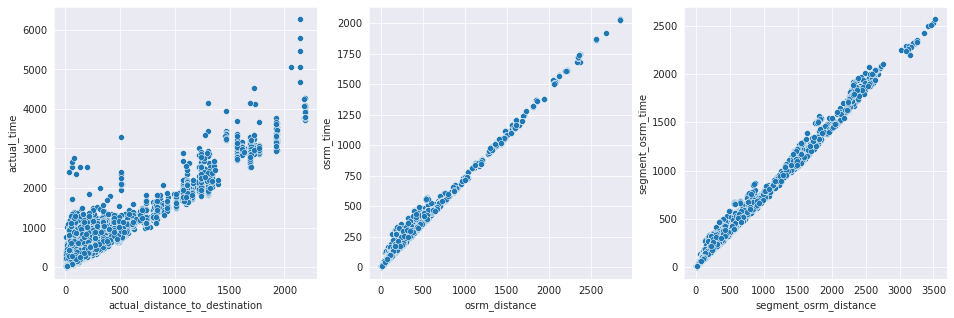

In [1009]:
# Check relation/correlation betwween - 
# 1. actual_distance_to_destination vs actual_time
# 2. osrm_distance vs osrm_time
# 3. segment_osrm_distance vs segment_osrm_time

plt.rcParams['figure.figsize'] = (16,5)
plt.grid(color='r')
plt.subplot(1,3,1)
sns.scatterplot(data=df_final,x='actual_distance_to_destination',y='actual_time')
plt.subplot(1,3,2)
sns.scatterplot(data=df_final,x='osrm_distance',y='osrm_time')
plt.subplot(1,3,3)
sns.scatterplot(data=df_final,x='segment_osrm_distance',y='segment_osrm_time')
plt.show()

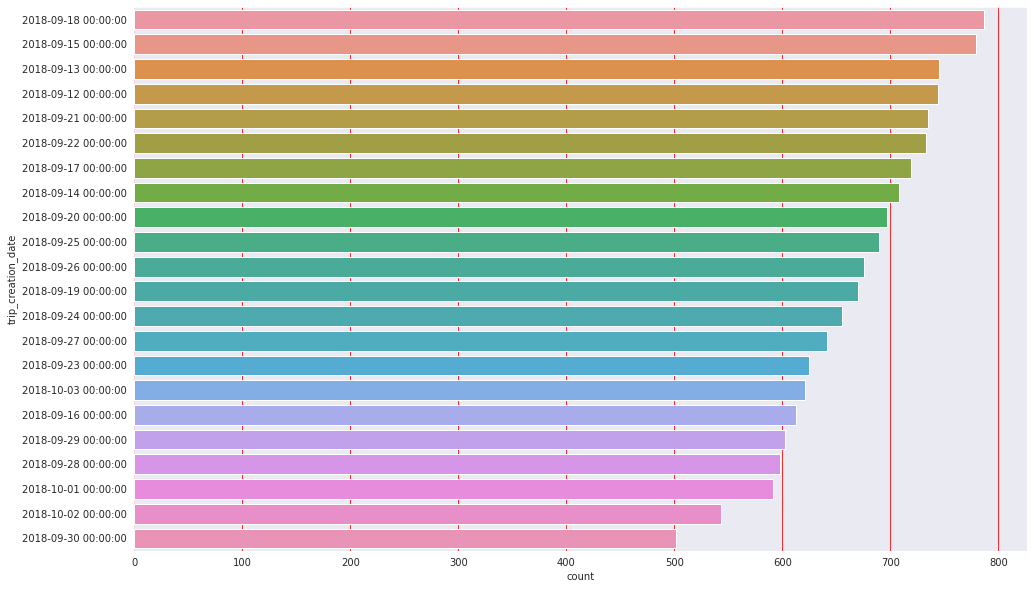

In [1010]:
# Plot count of trips per date in descending order
# 1. There isn't any pattern or much difference in the count based on trip_creation_date

plt.rcParams['figure.figsize'] = (16,10)
plt.grid(color='r')
sns.countplot(data=df_final
              ,y='trip_creation_date'
              ,order = df_final['trip_creation_date'].value_counts().index)
plt.show()

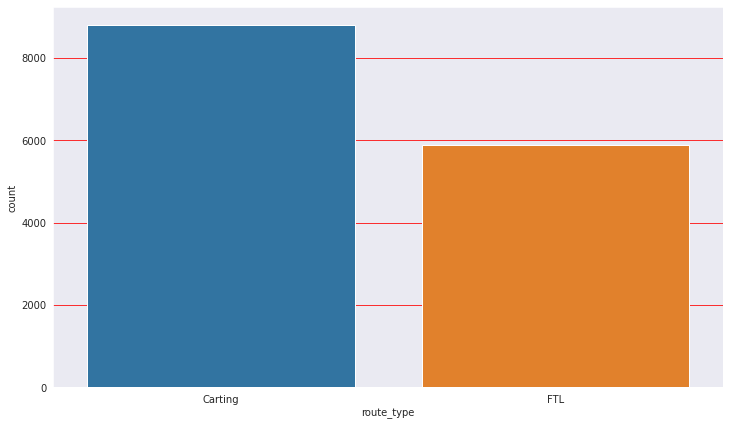

In [1011]:
# Plot count of trips under categories - carting and FTL
# 1. Carting type has more trips compared to FTL type

plt.rcParams['figure.figsize'] = (12,7)
plt.grid(color='r')
sns.countplot(data=df_final
              , x='route_type'
              ,order = df_final['route_type'].value_counts().index)
plt.show()

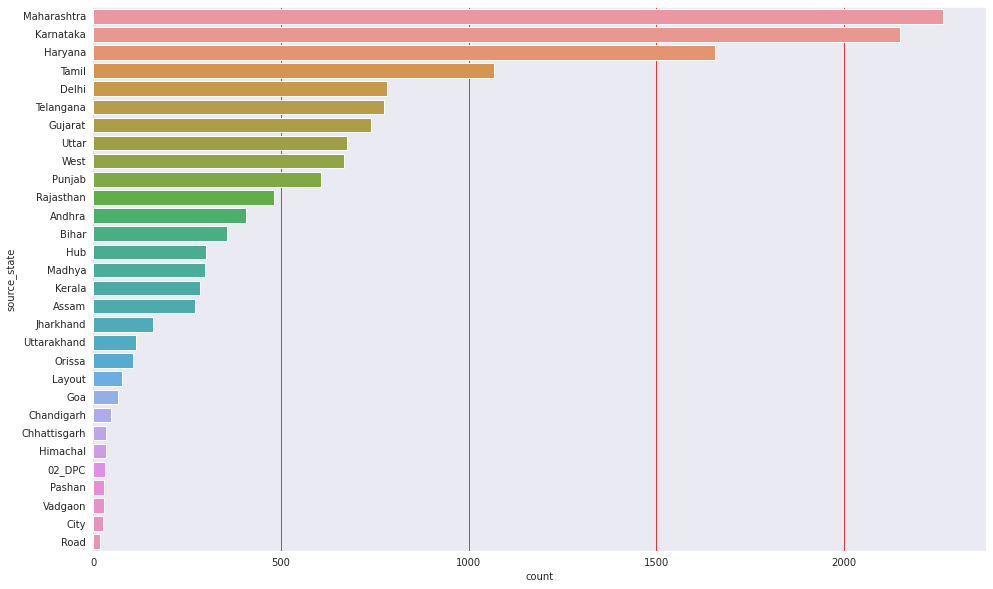

In [1012]:
# Plot count of trips per source state for top 30 source states
# 1. Source state Maharashtra has the highest number of trips
# 2. Source state Karnataka has the second highest number of trips

plt.rcParams['figure.figsize'] = (16,10)
plt.grid(color='r')
sns.countplot(data=df_final
              ,y='source_state'
              ,order = df_final['source_state'].value_counts().iloc[:30].index)
plt.show()

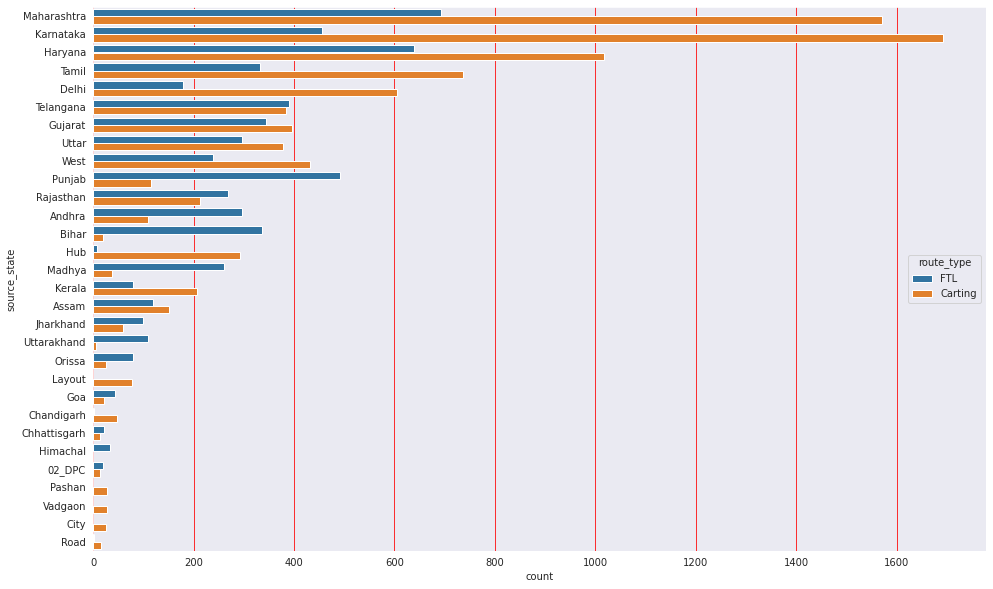

In [1013]:
# Plot count of trips - carting and FTL per source state for top 30 source states
# 1. Source state Maharashtra has the highest number of FTL trips
# 2. Source state Haryana has the second highest number of FTL trips
# 3. Source state Karnataka has the highest number of carting trips
# 4. Source state Maharashtra has the second highest number of carting trips

plt.rcParams['figure.figsize'] = (16,10)
plt.grid(color='r')
sns.countplot(data=df_final
              ,y='source_state'
              ,order = df_final['source_state'].value_counts().iloc[:30].index
              ,hue = df_final['route_type'])
plt.show()

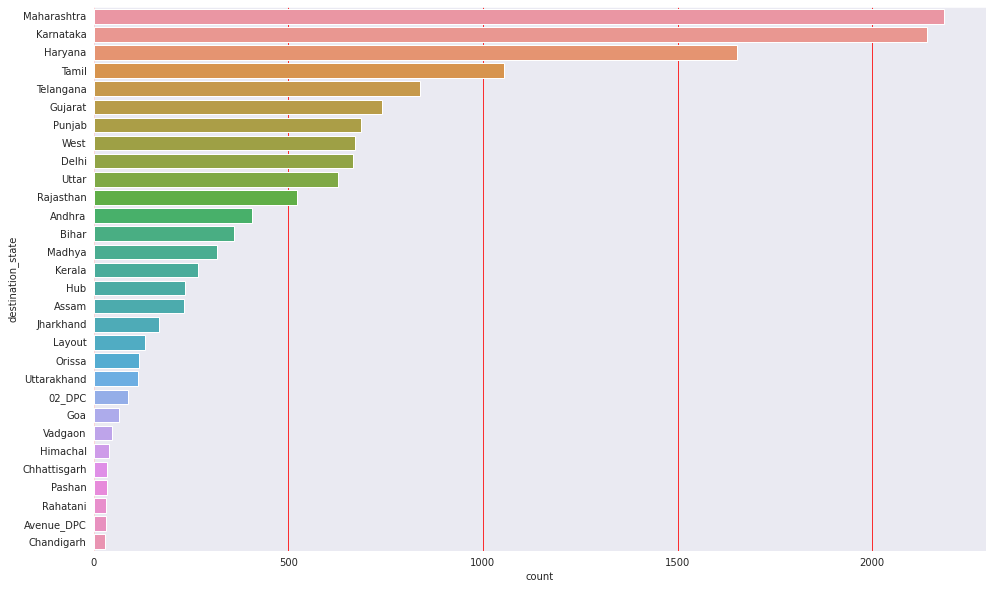

In [1014]:
# Plot count of trips per destination state for top 30 source states
# 1. destination state Maharashtra has the highest number of trips
# 2. destination state Karnataka has the second highest number of trips

plt.rcParams['figure.figsize'] = (16,10)
plt.grid(color='r')
sns.countplot(data=df_final
              ,y='destination_state'
              ,order = df_final['destination_state'].value_counts().iloc[:30].index)
plt.show()

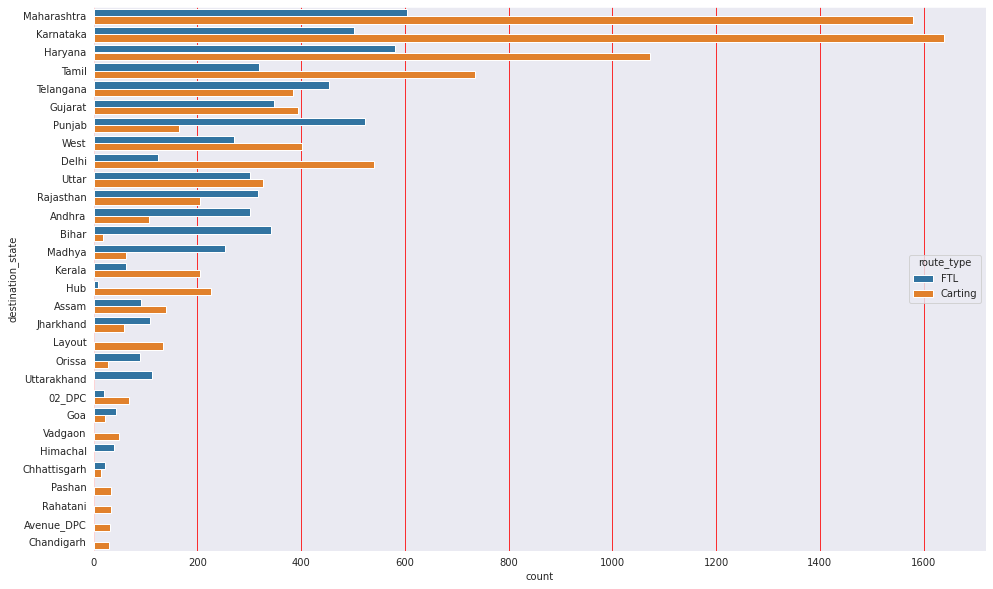

In [1015]:
# Plot count of trips - carting and FTL per destination state for top 30 source states
# 1. destination state Maharashtra has the highest number of FTL trips
# 2. destination state Haryana has the second highest number of FTL trips
# 3. destination state Karnataka has the highest number of carting trips
# 4. destination state Maharashtra has the second highest number of carting trips

plt.rcParams['figure.figsize'] = (16,10)
plt.grid(color='r')
sns.countplot(data=df_final
              ,y='destination_state'
              ,order = df_final['destination_state'].value_counts().iloc[:30].index
              ,hue = df_final['route_type'])
plt.show()

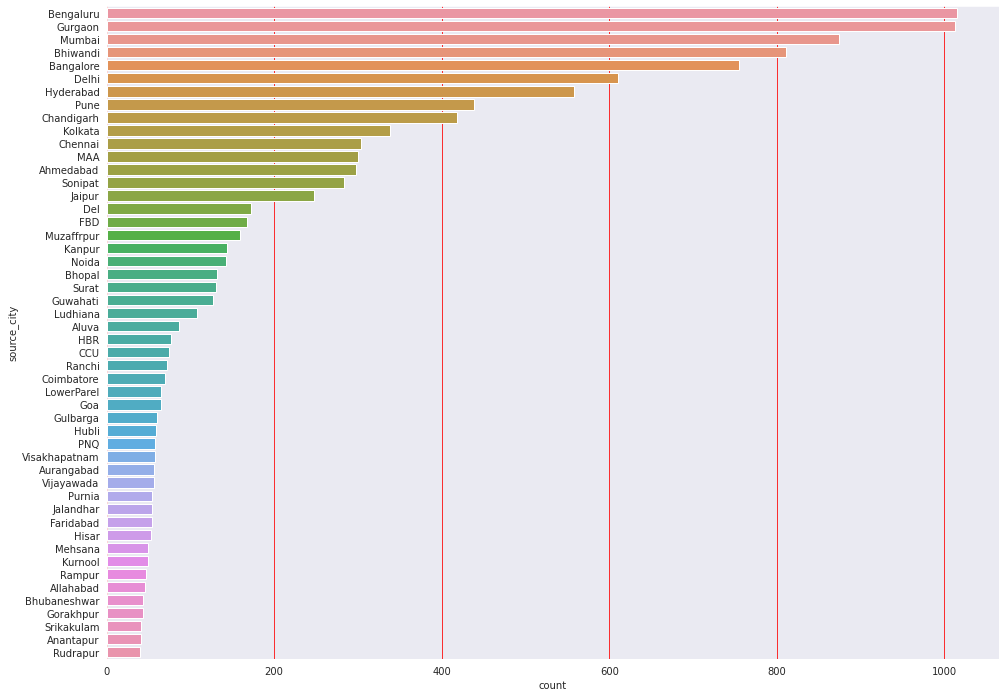

In [1016]:
# Plot count of trips per source city for top 50 source city
# 1. Source city Bengaluru has the highest number of trips
# 2. Source city Gurgaon has the second highest number of trips

plt.rcParams['figure.figsize'] = (16,12)
plt.grid(color='r')
sns.countplot(data=df_final
              ,y='source_city'
              ,order = df_final['source_city'].value_counts().iloc[:50].index)
plt.show()

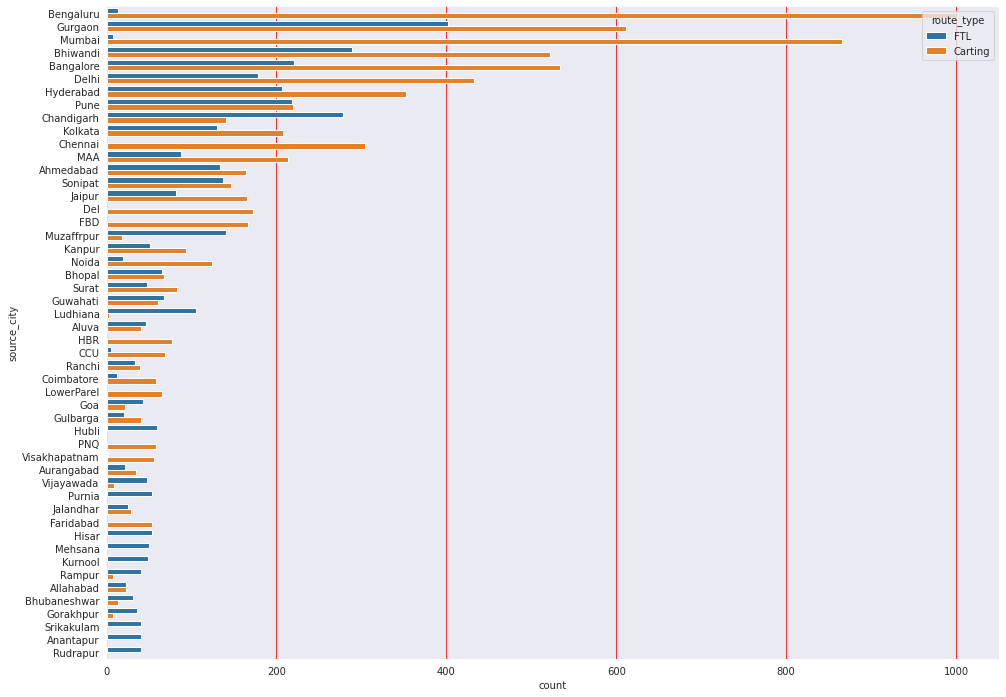

In [1017]:
# Plot count of trips - carting and FTL per source city for top 50 source city
# 1. Source city Gurgaon has the highest number of FTL trips
# 2. Source city Bengaluru has the highest number of carting trips

plt.rcParams['figure.figsize'] = (16,12)
plt.grid(color='r')
sns.countplot(data=df_final
              ,y='source_city'
              ,order = df_final['source_city'].value_counts().iloc[:50].index
              ,hue = df_final['route_type'])
plt.show()

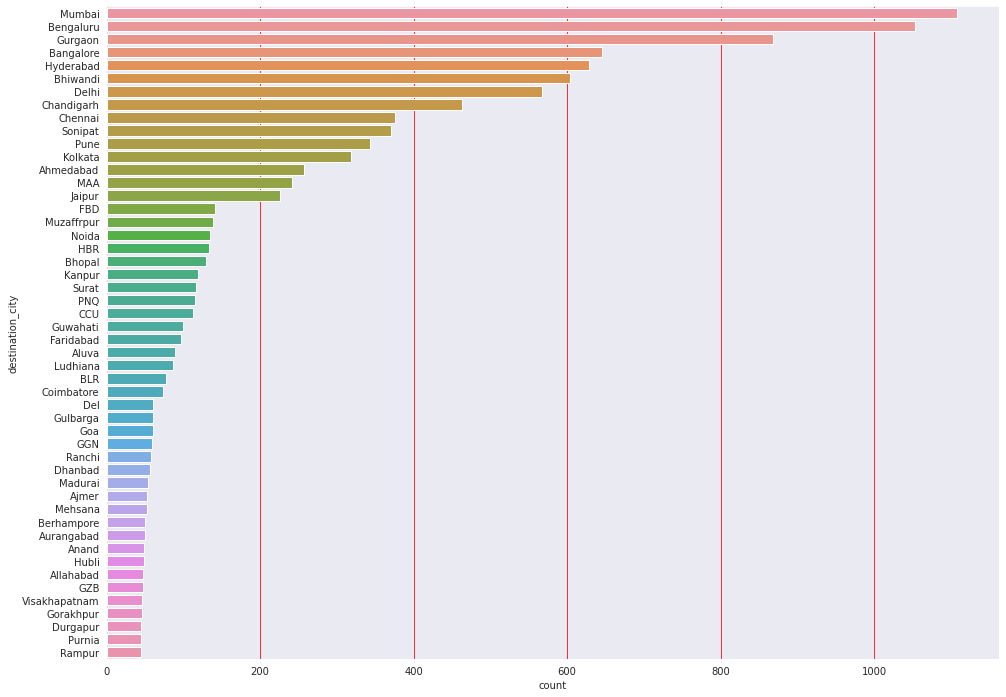

In [1018]:
# Plot count of trips per destination city for top 50 source city
# 1. Destination city Mumbai has the highest number of trips
# 2. Destination city Bengaluru has the second highest number of trips

plt.rcParams['figure.figsize'] = (16,12)
plt.grid(color='r')
sns.countplot(data=df_final
              ,y='destination_city'
              ,order = df_final['destination_city'].value_counts().iloc[:50].index)
plt.show()

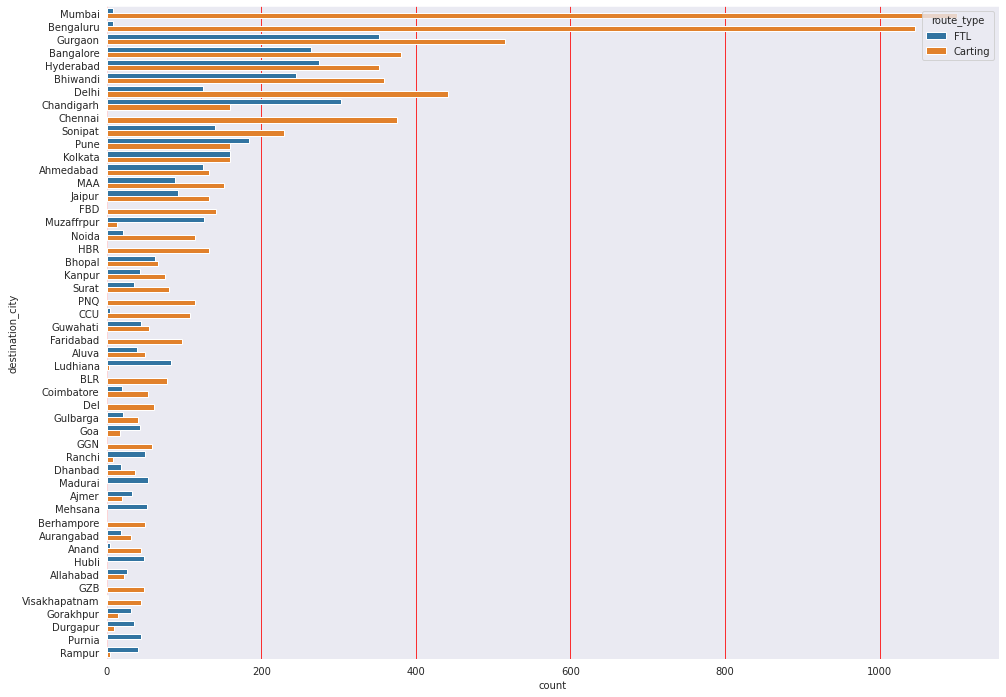

In [1019]:
# Plot count of trips carting and FTL per destination city for top 50 source city
# 1. Destination city Gurgaon has the highest number of FTL trips
# 2. Destination city Mumbai has the highest number of carting trips

plt.rcParams['figure.figsize'] = (16,12)
plt.grid(color='r')
sns.countplot(data=df_final
              ,y='destination_city'
              ,order = df_final['destination_city'].value_counts().iloc[:50].index
              ,hue = df_final['route_type'])
plt.show()

# Hypothesis testing
1. Distribution plots
2. T-test at 5% significance level

In [1020]:
#-----------------------------------------------------------------------#
#- Hypothesis Testing                                                  -#
#-----------------------------------------------------------------------#

In [1021]:
#-start_scan_to_end_scan vs od_time_diff
# H0 : Mean start_scan_to_end_scan = Mean od_time_diff
# Ha : Mean start_scan_to_end_scan != Mean od_time_diff

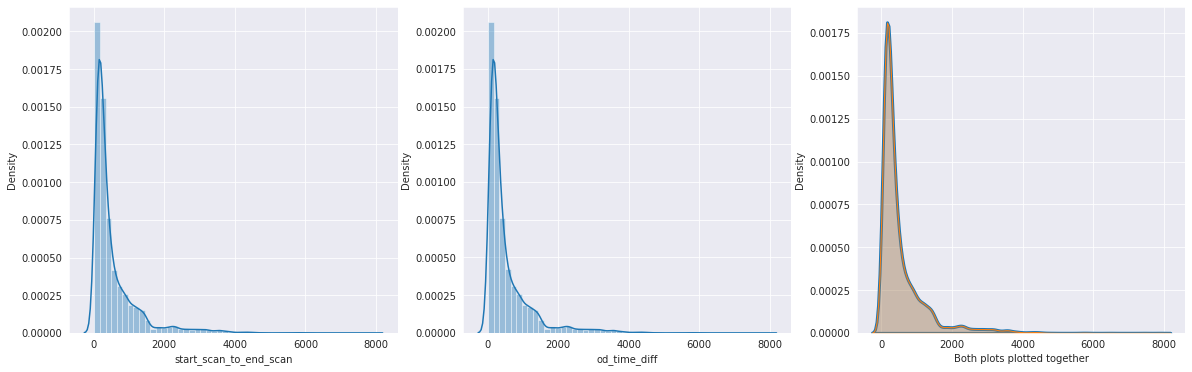

In [1022]:
# Plot Distribution -
# 1. start_scan_to_end_scan
# 2. od_time_diff
# 3. Both 

plt.rcParams['figure.figsize'] = (20,6)
plt.grid(color='r')
plt.subplot(1,3,1)
sns.distplot(df_final['start_scan_to_end_scan'])
plt.subplot(1,3,2)
sns.distplot(df_final['od_time_diff'])
plt.subplot(1,3,3)
sns.distplot(df_final['start_scan_to_end_scan'],hist=False,kde_kws={'shade':True,'linewidth':3})
sns.distplot(df_final['od_time_diff'],hist=False,kde_kws={'shade':True,'linewidth':1})
plt.xlabel('Both plots plotted together')
plt.show()

In [1023]:
# Perform t-test
# p-value = 0.90
# Inference: At alpha = 5% significance level we accept the null hypothesis as p-value is > alpha
# conclusion: Mean of start_scan_to_end_scan is same as od_time_diff

scipy.stats.ttest_ind(df_final['start_scan_to_end_scan'], df_final['od_time_diff'])

Ttest_indResult(statistic=-0.11467517222871326, pvalue=0.9087033783680507)

In [1024]:
# actual time vs osrm time
# H0: Mean actual time = Mean osrm time
# Ha: Mean actual time != Mean osrm time

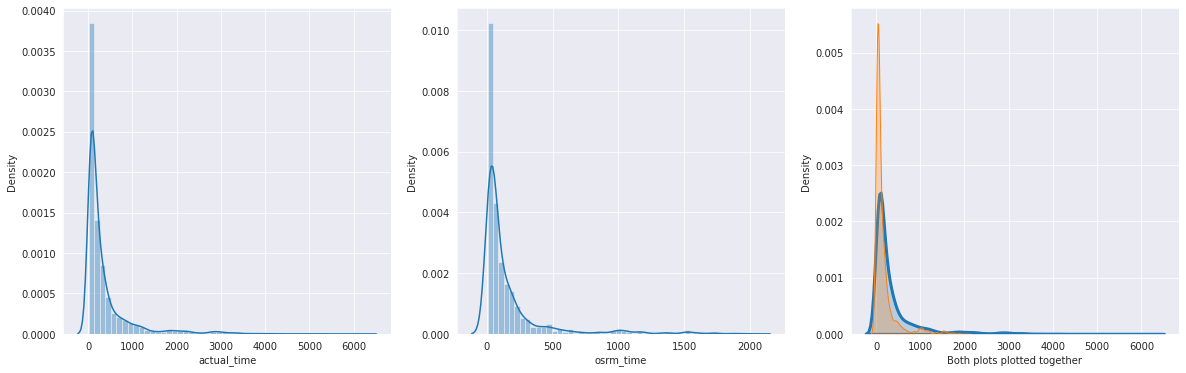

In [1025]:
# Plot distributions of -
# 1. actual time
# 2. osrm time
# 3. Both

plt.rcParams['figure.figsize'] = (20,6)
plt.grid(color='r')
plt.subplot(1,3,1)
sns.distplot(df_final['actual_time'])
plt.subplot(1,3,2)
sns.distplot(df_final['osrm_time'])
plt.subplot(1,3,3)
sns.distplot(df_final['actual_time'],hist=False,kde_kws={'shade':True,'linewidth':3})
sns.distplot(df_final['osrm_time'],hist=False,kde_kws={'shade':True,'linewidth':1})
plt.xlabel('Both plots plotted together')
plt.show()

In [1026]:
# Perform t-test
# p-value = power of -310 which is very very small
# Inference: At alpha = 5% significance level we reject the null hypothesis as p-value is < alpha
# Conclusion: Mean of actual time is not same as mean of osrm time

scipy.stats.ttest_ind(df_final['actual_time'], df_final['osrm_time'])

Ttest_indResult(statistic=38.087893389967235, pvalue=7.20645534232477e-310)

In [1027]:
# actual time vs segment actual time
# H0: Mean actual time = Mean segment actual time
# Ha: Mean actual time != Mean segment actual time

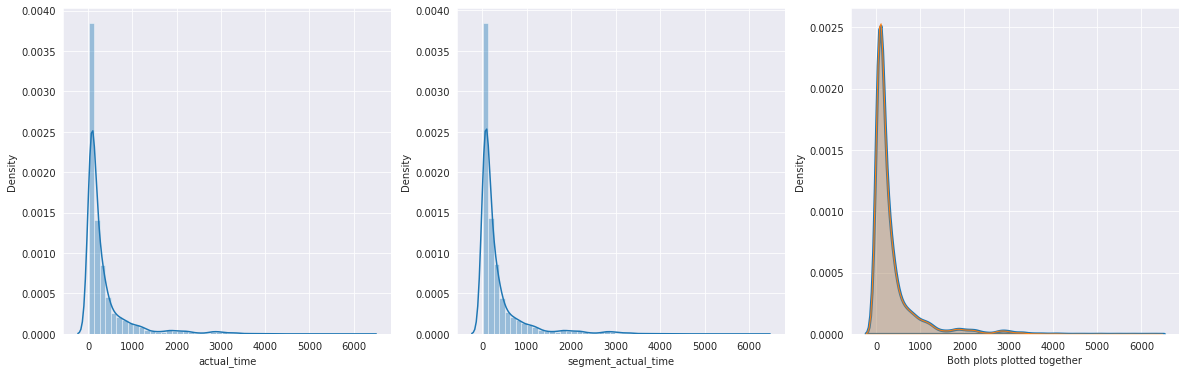

In [1028]:
# Plot distributions of 
# 1. actual time
# 2. segment actual time
# 3. Both

plt.rcParams['figure.figsize'] = (20,6)
plt.grid(color='r')
plt.subplot(1,3,1)
sns.distplot(df_final['actual_time'])
plt.subplot(1,3,2)
sns.distplot(df_final['segment_actual_time'])
plt.subplot(1,3,3)
sns.distplot(df_final['actual_time'],hist=False,kde_kws={'shade':True, 'linewidth':3})
sns.distplot(df_final['segment_actual_time'],hist=False,kde_kws={'shade':True, 'linewidth':1})
plt.xlabel('Both plots plotted together')
plt.show()

In [1029]:
# Perform t-test
# p-value = 0.63
# Inference: At alpha = 5% significance level we accept the null hypothesis as p-value is > alpha
# Conclusion: Mean of actual time is same as of segment actual time

scipy.stats.ttest_ind(df_final['actual_time'], df_final['segment_actual_time'])

Ttest_indResult(statistic=0.4680473556340283, pvalue=0.6397542012803814)

In [1030]:
# osrm_distance vs segment_osrm_distance
# H0: Mean osrm distance = Mean segment osrm distance
# Ha: Mean osrm distance != Mean segment osrm distance

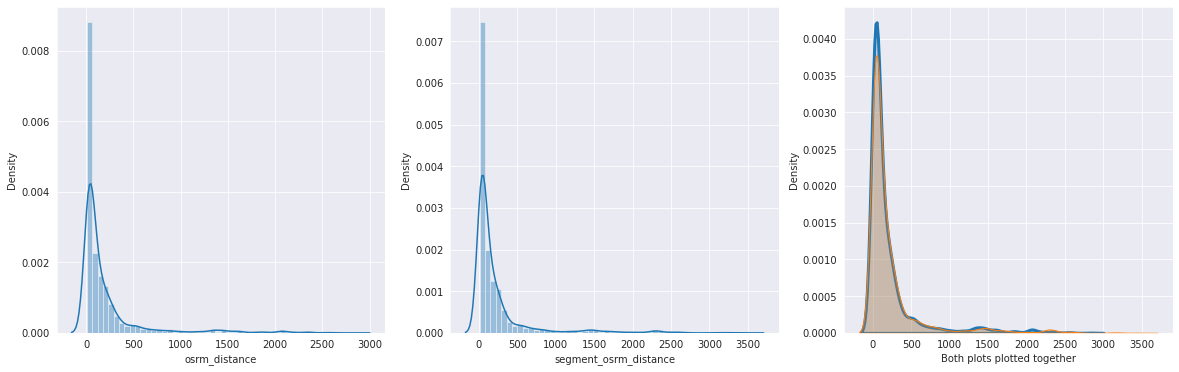

In [1031]:
# Plot distributions of 
# 1. osrm distance
# 2. segment osrm distance
# 3. Both

plt.rcParams['figure.figsize'] = (20,6)
plt.grid(color='r')
plt.subplot(1,3,1)
sns.distplot(df_final['osrm_distance'])
plt.subplot(1,3,2)
sns.distplot(df_final['segment_osrm_distance'])
plt.subplot(1,3,3)
sns.distplot(df_final['osrm_distance'],hist=False,kde_kws={'shade':True, 'linewidth':3})
sns.distplot(df_final['segment_osrm_distance'],hist=False,kde_kws={'shade':True, 'linewidth':1})
plt.xlabel('Both plots plotted together')
plt.show()

In [1032]:
# Perform t-test
# p-value = power of -5 which is very very small
# Inference: At alpha = 5% significance level we reject the null hypothesis as p-value is < alpha
# Conclusion: Mean of osrm distance is not same as of segment osrm distance

scipy.stats.ttest_ind(df_final['osrm_distance'], df_final['segment_osrm_distance'])

Ttest_indResult(statistic=-4.152745444338152, pvalue=3.2943805402482425e-05)

In [1033]:
# osrm time vs segment osrm time
# H0: Mean osrm time = Mean segment osrm time
# Ha: Mean osrm time != Mean segment osrm time

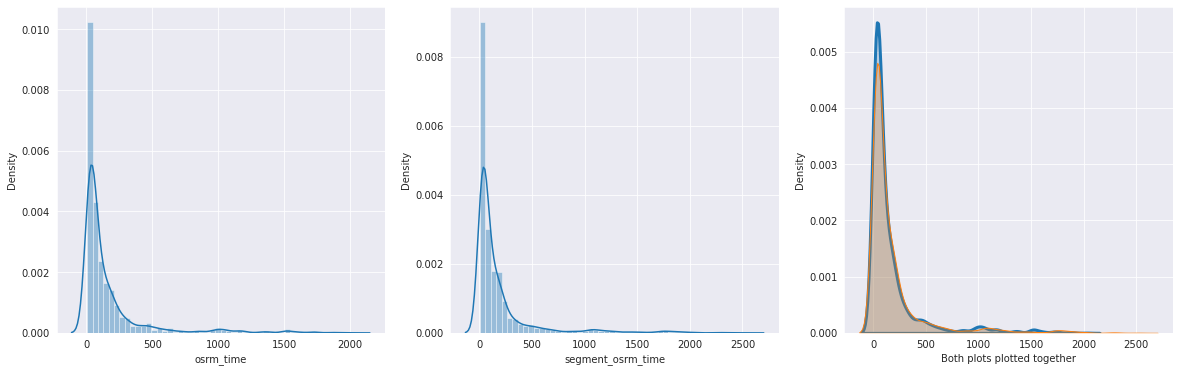

In [1034]:
# Plot distributions of -
# 1. osrm time
# 2. segment osrm time
# 3. Both 

plt.rcParams['figure.figsize'] = (20,6)
plt.grid(color='r')
plt.subplot(1,3,1)
sns.distplot(df_final['osrm_time'])
plt.subplot(1,3,2)
sns.distplot(df_final['segment_osrm_time'])
plt.subplot(1,3,3)
sns.distplot(df_final['osrm_time'],hist=False,kde_kws={'shade':True, 'linewidth':3})
sns.distplot(df_final['segment_osrm_time'],hist=False,kde_kws={'shade':True, 'linewidth':1})
plt.xlabel('Both plots plotted together')
plt.show()

In [1035]:
# Perform t-test
# p-value = power of -9 which is very very small
# Inference: At alpha = 5% significance level we reject the null hypothesis as p-value is < alpha
# Conclusion: Mean of osrm time is not same as of segment osrm time

scipy.stats.ttest_ind(df_final['osrm_time'], df_final['segment_osrm_time'])

Ttest_indResult(statistic=-5.768783521060855, pvalue=8.064729477346434e-09)

# Outliers
1. Plot boxplots
2. Find outliers using IQR

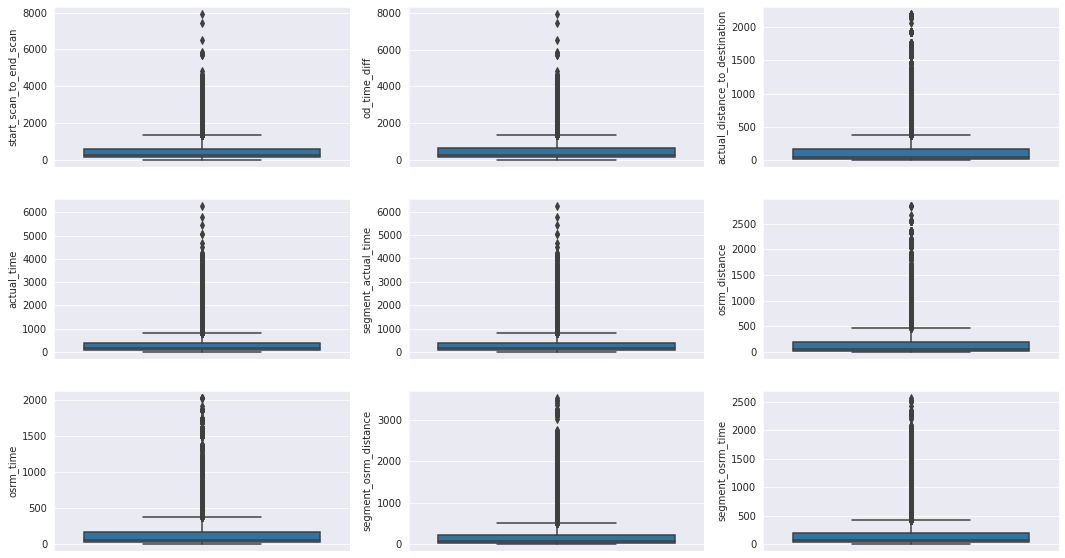

In [1036]:
# Plot outliers for numerical columns
# It won't make much sense to remove outliers as they are consistent across the features
plt.rcParams['figure.figsize'] = (18,10)
plt.grid(color='r')
plt.subplot(3,3,1)
sns.boxplot(data=df_final, y='start_scan_to_end_scan')
plt.subplot(3,3,2)
sns.boxplot(data=df_final, y='od_time_diff')
plt.subplot(3,3,3)
sns.boxplot(data=df_final, y='actual_distance_to_destination')
plt.subplot(3,3,4)
sns.boxplot(data=df_final, y='actual_time')
plt.subplot(3,3,5)
sns.boxplot(data=df_final, y='segment_actual_time')
plt.subplot(3,3,6)
sns.boxplot(data=df_final, y='osrm_distance')
plt.subplot(3,3,7)
sns.boxplot(data=df_final, y='osrm_time')
plt.subplot(3,3,8)
sns.boxplot(data=df_final, y='segment_osrm_distance')
plt.subplot(3,3,9)
sns.boxplot(data=df_final, y='segment_osrm_time')
plt.show()

In [1037]:
# Function to detect outliers

def detectOutliers(tf, attribute):
    Q1 = np.percentile(df[attribute], 25)
    Q3 = np.percentile(df[attribute], 75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = tf.loc[(tf[attribute] < LB) | (tf[attribute] > UB)]
    print('Column:',attribute)
    print('Q1 : {}'.format(Q1))
    print('Q3 : {}'.format(Q3))
    print('IQR : {}'.format(IQR))
    print('LB : {}'.format(LB))
    print('UB : {}'.format(UB))
    print('Number of outliers : {}'.format(outliers.shape[0]))
    print('----------------------------------------------------------------------------')

In [1038]:
# Get column names of df_final

df_final_columns = list(df_final.columns)

In [1039]:
# Get outlier details for all numerical cont. columns

for column in df_final_columns:
    if df_final[column].dtype in ['float64']:
        detectOutliers(df_final, column)

Column: start_scan_to_end_scan
Q1 : 161.0
Q3 : 1645.0
IQR : 1484.0
LB : -2065.0
UB : 3871.0
Number of outliers : 51
----------------------------------------------------------------------------
Column: od_time_diff
Q1 : 161.47
Q3 : 1645.23
IQR : 1483.76
LB : -2064.17
UB : 3870.87
Number of outliers : 51
----------------------------------------------------------------------------
Column: actual_distance_to_destination
Q1 : 23.352026892994942
Q3 : 286.9192937699907
IQR : 263.56726687699575
LB : -371.99887342249866
UB : 682.2701940854843
Number of outliers : 850
----------------------------------------------------------------------------
Column: actual_time
Q1 : 51.0
Q3 : 516.0
IQR : 465.0
LB : -646.5
UB : 1213.5
Number of outliers : 942
----------------------------------------------------------------------------
Column: segment_actual_time
Q1 : 20.0
Q3 : 40.0
IQR : 20.0
LB : -10.0
UB : 70.0
Number of outliers : 10749
------------------------------------------------------------------------

# One hot encoding for categorical variables
1. route_type
2. data

In [1040]:
# Get value counts before one-hot encoding

df_final['route_type'].value_counts()

Carting    8799
FTL        5874
Name: route_type, dtype: int64

In [1041]:
# Perform one-hot encoding on categorical column route type

df_final['route_type'] = pd.get_dummies(df_final['route_type'])['Carting']

In [1042]:
# Get value counts after one-hot encoding

df_final['route_type'].value_counts()

1    8799
0    5874
Name: route_type, dtype: int64

In [1043]:
# Get value counts of categorical variable 'data' before one-hot encoding

df_final['data'].value_counts()

training    10575
test         4098
Name: data, dtype: int64

In [1044]:
# Perform one-hot encoding on categorical variable 'data'

df_final['data'] = pd.get_dummies(df_final['data'])['training']

In [1045]:
# Get value counts after one-hot encoding

df_final['data'].value_counts()

1    10575
0     4098
Name: data, dtype: int64

# Standardization/Normalization for numerical cont. features
1. start_scan_to_end_scan
2. od_time_diff
3. actual_distance_to_destination
4. actual_time
5. segment_actual_time
6. osrm_distance
7. osrm_time
8. segment_osrm_distance
9. segment_osrm_time

In [1046]:
# Make a copy of data to perform standardization/normalization

df_std = df_final.copy()

In [1047]:
# Drop the columns on which we can not perform standardization as of now

df_std = df_std.drop(['trip_uuid'
                                ,'trip_creation_date'
                                ,'source_center'
                                ,'source_place_code'
                                ,'destination_center'
                                ,'destination_place_code'], axis=1)

In [1048]:
# Get a glimpse of data on which we need to perform standardization

df_std.head()

,trip_creation_year,trip_creation_month,trip_creation_day,route_type,source_city,source_state,destination_city,destination_state,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time,osrm_distance,osrm_time,segment_osrm_distance,segment_osrm_time,data
0,2018,9,12,0,Bhopal,Madhya,Gurgaon,Haryana,2259.0,2260.11,824.73,1562.0,1548.0,991.35,717.0,1320.47,1008.0,1
1,2018,9,12,1,Tumkur,Karnataka,Chikblapur,Karnataka,180.0,181.61,73.19,143.0,141.0,85.11,68.0,84.19,65.0,1
2,2018,9,12,0,Bangalore,Karnataka,Chandigarh,Punjab,3933.0,3934.36,1927.40,3347.0,3308.0,2354.07,1740.0,2545.27,1941.0,1
3,2018,9,12,1,Mumbai,Hub,Mumbai,Maharashtra,100.0,100.49,17.18,59.0,59.0,19.68,15.0,19.88,16.0,1
4,2018,9,12,0,Bellary,Karnataka,Bellary,Karnataka,717.0,718.34,127.45,341.0,340.0,146.79,117.0,146.79,115.0,1


In [1049]:
# Extract the data/columns on which we need to perform standardization

data_tobe_transform = df_std[['start_scan_to_end_scan'
                                  ,'od_time_diff'
                                  ,'actual_distance_to_destination'
                                  ,'actual_time'
                                  ,'segment_actual_time'
                                  ,'osrm_distance'
                                  ,'osrm_time'
                                  ,'segment_osrm_distance'
                                  ,'segment_osrm_time']]

In [1050]:
# Generate scaler object for StandardScaler()

scaler = StandardScaler()

In [1051]:
# Perform standardization

data_transformed = pd.DataFrame(scaler.fit_transform(data_tobe_transform))

In [1052]:
# Get a glimpse of standardized data

data_transformed.head()

,0,1,2,3,4,5,6,7,8
0,2.618797,2.618506,2.152894,2.137484,2.137855,2.115529,2.039055,2.622099,2.618324
1,-0.532897,-0.531666,-0.299953,-0.382951,-0.384625,-0.322998,-0.345197,-0.335215,-0.370191
2,5.156525,5.155998,5.751746,5.308010,5.293196,5.782362,5.797282,5.551952,5.575147
3,-0.654174,-0.654612,-0.482756,-0.532152,-0.531636,-0.499059,-0.539905,-0.489052,-0.525479
4,0.281177,0.281801,-0.122861,-0.031262,-0.027857,-0.157029,-0.165184,-0.185469,-0.211733


In [1053]:
# Replace the original data with standardized data

df_std['start_scan_to_end_scan'] = data_transformed[0]
df_std['od_time_diff'] = data_transformed[1]
df_std['actual_distance_to_destination'] = data_transformed[2]
df_std['actual_time'] = data_transformed[3]
df_std['segment_actual_time'] = data_transformed[4]
df_std['osrm_distance'] = data_transformed[5]
df_std['osrm_time'] = data_transformed[6]
df_std['segment_osrm_distance'] = data_transformed[7]
df_std['segment_osrm_time'] = data_transformed[8]

In [1054]:
# Get a glimpse of standardized data (except few categorical variables)

df_std.head()

,trip_creation_year,trip_creation_month,trip_creation_day,route_type,source_city,source_state,destination_city,destination_state,start_scan_to_end_scan,od_time_diff,actual_distance_to_destination,actual_time,segment_actual_time,osrm_distance,osrm_time,segment_osrm_distance,segment_osrm_time,data
0,2018,9,12,0,Bhopal,Madhya,Gurgaon,Haryana,2.618797,2.618506,2.152894,2.137484,2.137855,2.115529,2.039055,2.622099,2.618324,1
1,2018,9,12,1,Tumkur,Karnataka,Chikblapur,Karnataka,-0.532897,-0.531666,-0.299953,-0.382951,-0.384625,-0.322998,-0.345197,-0.335215,-0.370191,1
2,2018,9,12,0,Bangalore,Karnataka,Chandigarh,Punjab,5.156525,5.155998,5.751746,5.308010,5.293196,5.782362,5.797282,5.551952,5.575147,1
3,2018,9,12,1,Mumbai,Hub,Mumbai,Maharashtra,-0.654174,-0.654612,-0.482756,-0.532152,-0.531636,-0.499059,-0.539905,-0.489052,-0.525479,1
4,2018,9,12,0,Bellary,Karnataka,Bellary,Karnataka,0.281177,0.281801,-0.122861,-0.031262,-0.027857,-0.157029,-0.165184,-0.185469,-0.211733,1


# Correlation Map

In [1055]:
# Get correlation dataframe

corr = df_std.corr()

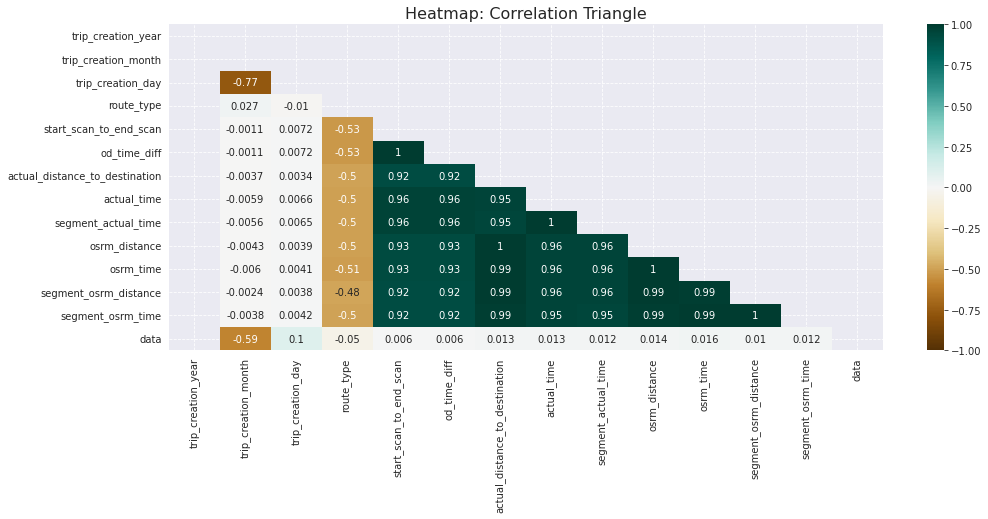

In [1056]:
# Plot correlation triangle heat map 

plt.rcParams['figure.figsize'] = (9,7)
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Heatmap: Correlation Triangle',fontdict={'fontsize':16})
plt.grid(linestyle='--')
plt.show()